In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# reading and shuffling the data
difference = 0
df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values

myData = (df - df.min()) / (df.max() - df.min())
X = myData.iloc[:, :-1]
y = myData.iloc[:, -1:]

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_y, test_y = X[:splitData], X[splitData:], y[:splitData], y[splitData:]

iter_value = 200
iter_value+=1
skip_num=10
iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((10, 10, 10))
error_array = np.zeros((10, iter_scaled))

In [5]:
def randomiseMatrix(deg):
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()                 # assigning random values for weights
    return A            

In [6]:
def GD(deg, X, y, learning_rate, iterations):
    
    A = randomiseMatrix(deg)
                
    for itr in range(iterations):
        sumItrError = 0
        eachIFErrorList = []

        for z in range(len(X)):                           # for each row in input data
            row = X.iloc[z]                                     # contains strength, temperature
            column = y.iloc[z]                              # contains pressure
            eachIFError = 0                                  # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    eachIFError += A[m][n]*(row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            eachIFError -= column[0]                    # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn 
            eachIFErrorList.append(eachIFError)
            sumItrError +=  (eachIFError**2)*0.5              


        for m in range(deg+1):
            for n in range(deg+1-m): 
                subSum = 0
                for z in range(len(X)):
                    row = X.iloc[z]
                    subSum += eachIFErrorList[z] * (row[0]**m) * (row[1]**n)
                A[m][n] -= (learning_rate/len(X))  * subSum

        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError

        if(itr == iterations - 1): 
            print("Error at the end of iteration of degree ", deg, " is:  " ,sumItrError)   
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = A[m][n]
    return sumItrError


Error at the end of iteration of degree  0  is:   67.05489177489127

Error values after each 10 complete iterations : 
[68.12890565912649, 67.18546678992004, 67.07076664839171, 67.05682178890414, 67.05512641953834, 67.05492030220344, 67.0548952431468, 67.0548921965509, 67.05489182615504, 67.05489178112427, 67.05489177564912, 67.05489177498356, 67.05489177490313, 67.0548917748939, 67.054891774892, 67.05489177489179, 67.05489177489193, 67.05489177489159, 67.05489177489201, 67.05489177489167, 67.05489177489127]


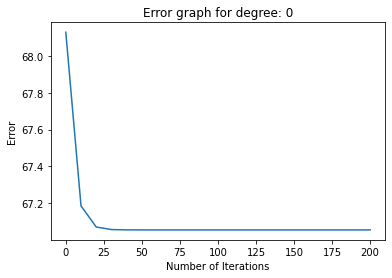

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  1  is:   27.074332206634878

Error values after each 10 complete iterations : 
[260.3697139259611, 77.78923054374746, 64.38781510024855, 58.1789569191377, 53.14521594615089, 48.9181859403368, 45.35815053816119, 42.35463023765025, 39.81570864161544, 37.664739075076405, 35.83780034262799, 34.28158244733856, 32.95162382488059, 31.810841441384138, 30.828305091156924, 29.97821532393737, 29.239051171797215, 28.592859466134275, 28.02466222177808, 27.521962473210994, 27.074332206634878]


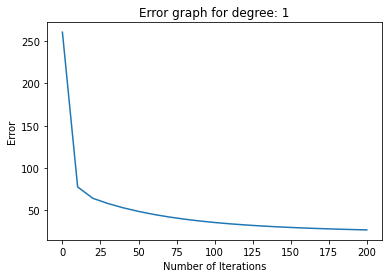

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  2  is:   37.148432504354865

Error values after each 10 complete iterations : 
[591.4687426602068, 59.33611838591544, 50.971153088462884, 49.87402383840885, 48.909777878774, 47.978627716068495, 47.07804410640246, 46.20691464108194, 45.36420655776515, 44.54893869655061, 43.76017423079288, 42.99701554404704, 42.25860042278773, 41.54409915974806, 40.85271229173679, 40.18366878210396, 39.53622451725483, 38.909661027270744, 38.30328436861767, 37.716424126096044, 37.148432504354865]


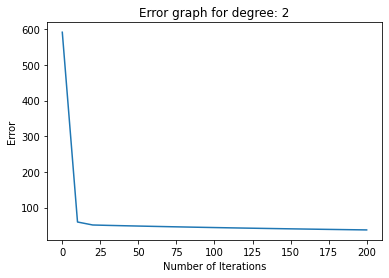

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  3  is:   48.45140713174254

Error values after each 10 complete iterations : 
[7121.334726861828, 674.8431111773504, 402.82634703350436, 266.3383608723299, 187.11503680346044, 140.52422546182675, 112.62614612112486, 95.46371721712849, 84.49299586884439, 77.11771848182649, 71.85312747066207, 67.84885446701392, 64.61667563363808, 61.87516407704202, 59.4610422775039, 57.27859290269712, 55.27078554667914, 53.402794639097245, 51.652587953563184, 50.005549865196556, 48.45140713174254]


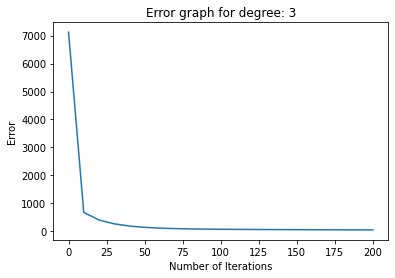

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  4  is:   35.81555723056642

Error values after each 10 complete iterations : 
[219.57849648814164, 46.438076295377165, 42.653362655889005, 40.910908419360304, 39.938122761285484, 39.33861173488259, 38.922195975019974, 38.59725821600781, 38.3195741742911, 38.06771453728862, 37.83121906547507, 37.60491073857796, 37.38616168405643, 37.173578177668595, 36.96636788636234, 36.76403513086539, 36.5662338779151, 36.372696594963095, 36.183199608313686, 35.997546040965915, 35.81555723056642]


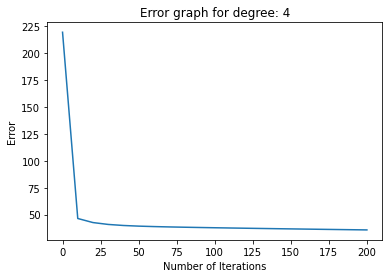

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  5  is:   34.75451994692735

Error values after each 10 complete iterations : 
[1110.1566305645276, 433.2883048293981, 223.57013743164757, 134.59079412370406, 95.35433260904145, 76.80025454236025, 66.97993771242446, 60.96626586673222, 56.714802566759204, 53.365938144676086, 50.5482450544878, 48.09251158319655, 45.914242069767, 43.9652765890225, 42.21378007183941, 40.635884946524236, 39.212129321513096, 37.925876208848486, 36.76255791736287, 35.70927019695821, 34.75451994692735]


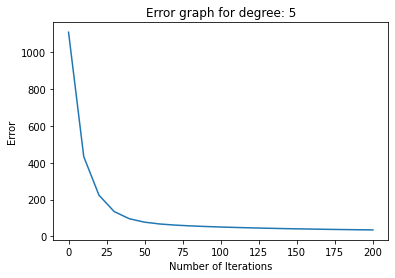

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  6  is:   48.69376786925342

Error values after each 10 complete iterations : 
[736.8818423268531, 246.51069046205458, 151.6593237484664, 113.76993601428889, 96.52276388040853, 87.05030537103089, 80.73863406217494, 75.90165820813624, 71.89614812466083, 68.45399635822321, 65.44518313050908, 62.79320839111731, 60.444553068205174, 58.357335905180584, 56.49683282940489, 54.833486516259306, 53.341851093114634, 51.999914625895435, 50.78859592896521, 49.691338271601005, 48.69376786925342]


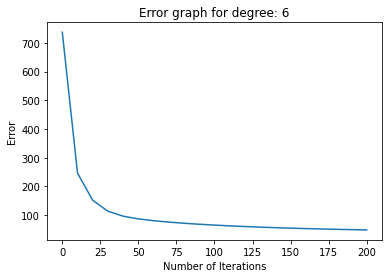

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  7  is:   49.017309810737984

Error values after each 10 complete iterations : 
[4625.3112581473415, 163.15382166671128, 131.6245703805066, 115.96778876602977, 105.59011530831678, 97.52683866290133, 90.77176896450997, 84.93483498849967, 79.82697719592235, 75.33069332784711, 71.3587757740287, 67.84041155647526, 64.71588532779822, 61.93408248926846, 59.450982720149405, 57.228567193064336, 55.23394539616442, 53.43862785741694, 51.81791028983965, 50.3503485743764, 49.017309810737984]


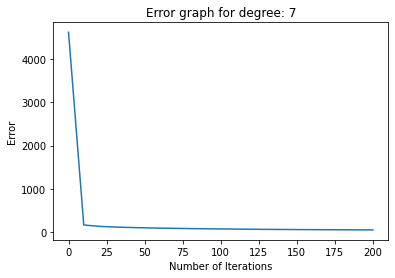

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  8  is:   25.320897252908267

Error values after each 10 complete iterations : 
[12653.618186076957, 679.0372129223331, 226.2735228807086, 100.6598604643427, 63.52015447108744, 50.73267200476112, 44.915017554610735, 41.31532213774276, 38.60100033710349, 36.370233500491345, 34.47886629222289, 32.85767084395616, 31.462174690332525, 30.258415952600416, 29.218510817365193, 28.318963535877558, 27.539794691415757, 26.863955438098237, 26.276873417138127, 25.766079904142725, 25.320897252908267]


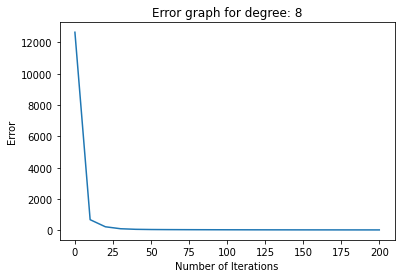

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  9  is:   44.55241180741539

Error values after each 10 complete iterations : 
[8121.9436812250015, 185.28950858186764, 96.16717865683455, 71.87208680976362, 63.52929953531741, 59.47639604253046, 56.827037315231415, 54.810673606416394, 53.17951088207288, 51.824611400444944, 50.68117066693717, 49.70345762933578, 48.85692414946751, 48.114841628716704, 47.456351995073284, 46.865114604167196, 46.32829505458087, 45.835789962299884, 45.379627418168525, 44.95350174134994, 44.55241180741539]


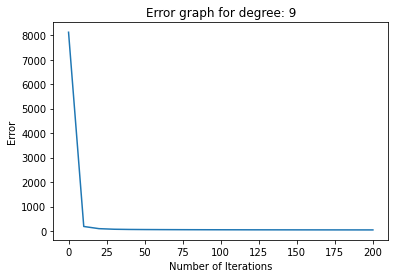

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Degree  8  gives minimum error.


In [7]:
#For training data

minError = 100000
minErrorDeg = -1

x_axis=[]
for i in range(iter_scaled):
    x_axis.append(i*skip_num)

    
for i in range(10):

    GD_Error = GD(i, train_X, train_y, 0.1 , iter_value)
    if(GD_Error <= minError):
        minError = GD_Error
        minErrorDeg = i

    error_list = error_array[i].tolist()  
    print("\nError values after each 10 complete iterations : ")
    print(error_list)
    
    plt.plot(x_axis, error_list)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    
    error_list=error_array[i].tolist()
    
print("Degree ", minErrorDeg, " gives minimum error.")      


In [8]:
def Predict_GD(deg, X, y, iterations):
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):    # for each row in input data
            row = X.iloc[z]              # contains strength, temperature
            column = y.iloc[z]        # contains pressure
            dotP_wx = 0                 # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += coeff_list[deg][m][n] * (row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column[0]                    # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
            sumItrError +=  (dotP_wx**2)*0.5  
            
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
    return sumItrError

In [9]:
# for testing data

minError = 100000
minErrorDeg = -1
print("Testing errors for various degrees are as follows:")

for i in range(10):
    SGD_Error = Predict_GD(i, test_X, test_y, iter_value)    
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
        
print("Degree ", minErrorDeg, " gives minimum error. \n Testing error = ", minError) 

Testing errors for various degrees are as follows:
Error of last iteration of degree  0  :   29.195262832425243
Error of last iteration of degree  1  :   11.010963993851716
Error of last iteration of degree  2  :   15.763623240929213
Error of last iteration of degree  3  :   20.094703324875578
Error of last iteration of degree  4  :   14.86477082400223
Error of last iteration of degree  5  :   12.855944384473768
Error of last iteration of degree  6  :   21.96578191752938
Error of last iteration of degree  7  :   20.029946390323342
Error of last iteration of degree  8  :   9.50691457233458
Error of last iteration of degree  9  :   18.18310954627055
Degree  8  gives minimum error. 
 Testing error =  9.50691457233458
